## 19 Cortes con mayor ganancia

Este algoritmo encuentra la forma optima de partir una caña de tamaño $n$ de tal forma que se maximizen las ganancias en funcion de un arreglo de precios $p$.

### 19.1 Algoritmo

In [1]:
using OffsetArrays

function extended_bottom_up_cut_rod(p::Vector{Int}, n::Int)
    r = OffsetVector([typemin(Int) for i in 1:n+1], 0:n)
    s = OffsetVector([typemin(Int) for i in 1:n+1], 0:n)
    r[0] = 0
    for j in 1:n
        q = typemin(Int)
        for i in 1:j
            if q < p[i] + r[j-i]
                q = p[i] + r[j-i]
                s[j] = i
            end
        end
        r[j] = q
    end
    return (r, s)
end

function print_cut_rod_solution(p::Vector{Int}, n::Int)
    r, s = extended_bottom_up_cut_rod(p, n)
    while n > 0
        print(s[n], ':', p[s[n]], '\n')
        n = n - s[n]
    end
end

print_cut_rod_solution([1, 5, 8, 9, 10, 17, 17, 20, 24, 30], 8)


2:5
6:17


### 19.2 Verificación

### 19.3 Análisis del tiempo de ejecución

Las dos primeras lineas tiene complejidad $\Theta(n)$ ya que solo rellenan arreglos de tamaño $n + 1$. Tenemos dos for-loops anidados que forman la suma  $1 + 2 + \dots + n$ y por lo tanto su tiempo de ejecucion es $\Theta(n^2)$.

### 19.4 Experimentación en el tiempo de ejecución

In [2]:
using BenchmarkTools
using Random
using Plots

Vamos a realizar 100 ejecuciones del algoritmo con arreglos aleatorios de tamaño $k = 1, 2, \dots, 100$.

In [5]:
A = [@belapsed extended_bottom_up_cut_rod(rand(1:100, $i), $i) for i in 1:100] * 10^9

100-element Vector{Float64}:
  129.7872340425532
  136.73708920187792
  170.2397743300423
  184.78605388272584
  202.06896551724137
  201.97628458498025
  216.3895486935867
  249.6875
  256.47058823529414
  287.58620689655174
    ⋮
 6925.0
 7050.0
 7200.0
 7300.0
 7450.0
 7575.0
 7725.0
 7833.333333333333
 8000.0

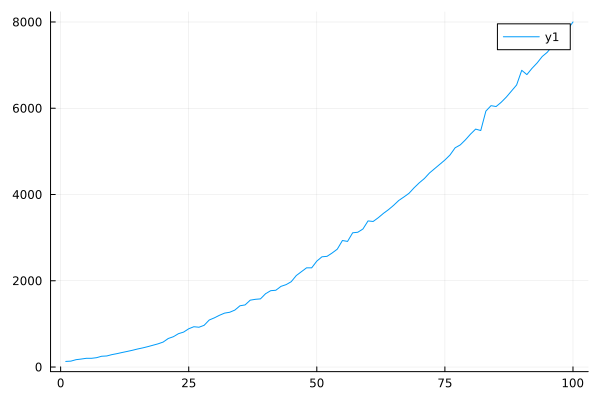

In [6]:
plot(A)